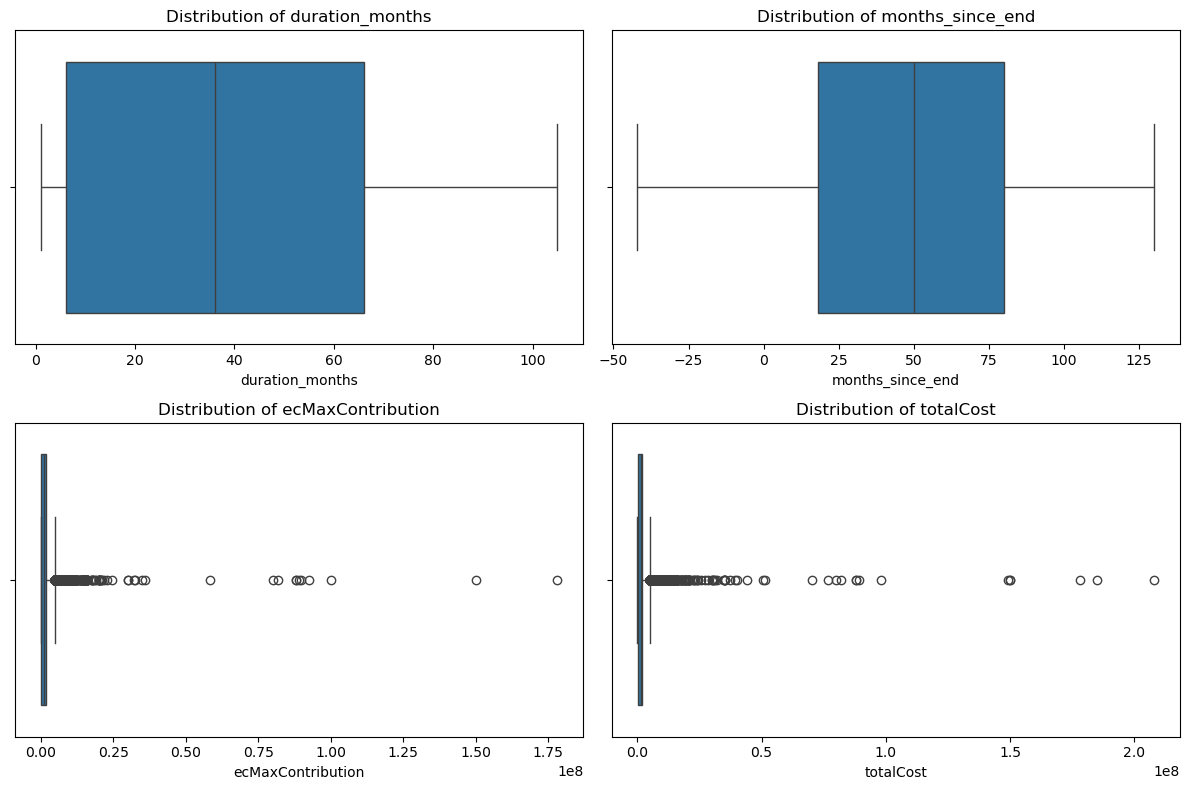

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your predictions data
data = pd.read_csv(r"C:\Users\jawri\Data course\Capstone\CORDIS data\Projects\project_features_with_predictions.csv")

# List of key features to plot
key_features = ['duration_months', 'months_since_end', 'ecMaxContribution', 'totalCost']

# Plot boxplots for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


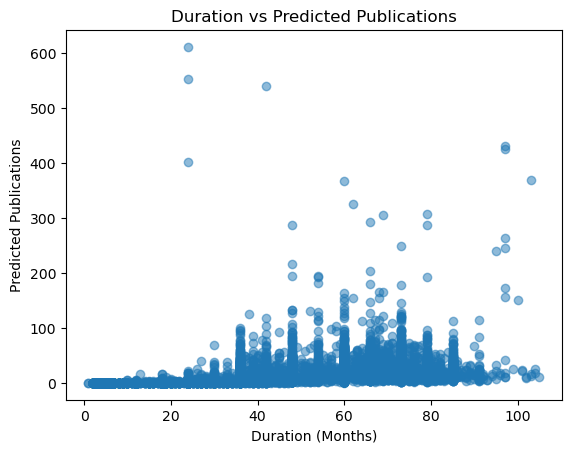

In [5]:
plt.scatter(data['duration_months'], data['pred_publications'], alpha=0.5)
plt.title('Duration vs Predicted Publications')
plt.xlabel('Duration (Months)')
plt.ylabel('Predicted Publications')
plt.show()



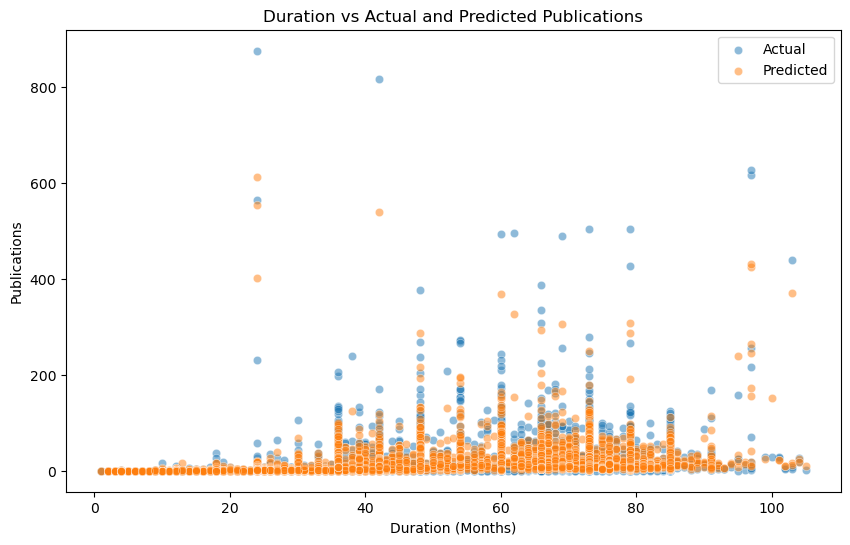

In [7]:

plt.figure(figsize=(10,6))

# Plot actual publications
sns.scatterplot(x='duration_months', y='num_publications', data=data, label='Actual', alpha=0.5)

# Plot predicted publications on same axes
sns.scatterplot(x='duration_months', y='pred_publications', data=data, label='Predicted', alpha=0.5)

plt.title('Duration vs Actual and Predicted Publications')
plt.xlabel('Duration (Months)')
plt.ylabel('Publications')
plt.legend()
plt.show()


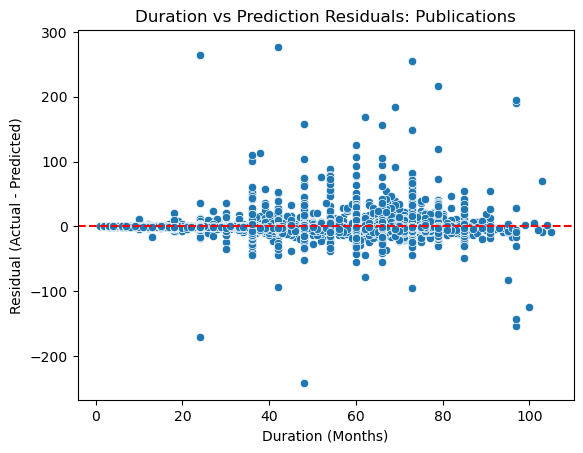

In [19]:
data['residuals'] = data['num_publications'] - data['pred_publications']

sns.scatterplot(x='duration_months', y='residuals', data=data)
plt.axhline(0, color='red', linestyle='--')
plt.title('Duration vs Prediction Residuals: Publications')
plt.xlabel('Duration (Months)')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()


In [11]:
print(data.columns.tolist())


['projectID', 'partnertype_HES', 'partnertype_OTH', 'partnertype_PRC', 'partnertype_PUB', 'partnertype_REC', 'has_sme', 'country_AE', 'country_AI', 'country_AL', 'country_AM', 'country_AO', 'country_AR', 'country_AT', 'country_AU', 'country_AZ', 'country_BA', 'country_BD', 'country_BE', 'country_BF', 'country_BG', 'country_BH', 'country_BI', 'country_BJ', 'country_BO', 'country_BQ', 'country_BR', 'country_BT', 'country_BW', 'country_BY', 'country_BZ', 'country_CA', 'country_CD', 'country_CG', 'country_CH', 'country_CI', 'country_CL', 'country_CM', 'country_CN', 'country_CO', 'country_CR', 'country_CU', 'country_CV', 'country_CY', 'country_CZ', 'country_DE', 'country_DJ', 'country_DK', 'country_DO', 'country_DZ', 'country_EC', 'country_EE', 'country_EG', 'country_EL', 'country_ES', 'country_ET', 'country_FI', 'country_FJ', 'country_FO', 'country_FR', 'country_GA', 'country_GD', 'country_GE', 'country_GH', 'country_GI', 'country_GL', 'country_GT', 'country_HK', 'country_HN', 'country_HR'

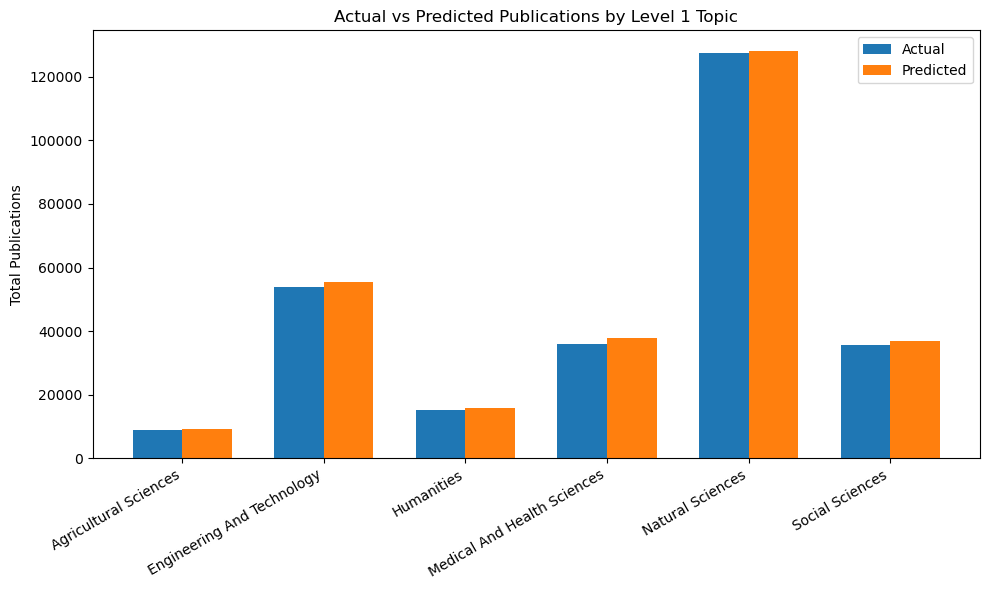

In [13]:


# Level 1 topic columns from your list
lvl1_topics = [
    'topiclvl1_agricultural sciences',
    'topiclvl1_engineering and technology',
    'topiclvl1_humanities',
    'topiclvl1_medical and health sciences',
    'topiclvl1_natural sciences',
    'topiclvl1_social sciences'
]

# Aggregate actual and predicted publications by summing over each topic
actual_counts = {}
pred_counts = {}

for topic in lvl1_topics:
    # Filter projects where topic is flagged (assuming binary 0/1)
    actual_counts[topic] = data.loc[data[topic] == 1, 'num_publications'].sum()
    pred_counts[topic] = data.loc[data[topic] == 1, 'pred_publications'].sum()

# Convert to DataFrame for plotting
topic_df = pd.DataFrame({
    'Topic': lvl1_topics,
    'Actual Publications': [actual_counts[t] for t in lvl1_topics],
    'Predicted Publications': [pred_counts[t] for t in lvl1_topics]
})

# Plot side-by-side bars
x = np.arange(len(lvl1_topics))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, topic_df['Actual Publications'], width, label='Actual')
rects2 = ax.bar(x + width/2, topic_df['Predicted Publications'], width, label='Predicted')

ax.set_xticks(x)
ax.set_xticklabels([t.replace('topiclvl1_', '').replace('_', ' ').title() for t in lvl1_topics], rotation=30, ha='right')
ax.set_ylabel('Total Publications')
ax.set_title('Actual vs Predicted Publications by Level 1 Topic')
ax.legend()

plt.tight_layout()
plt.show()


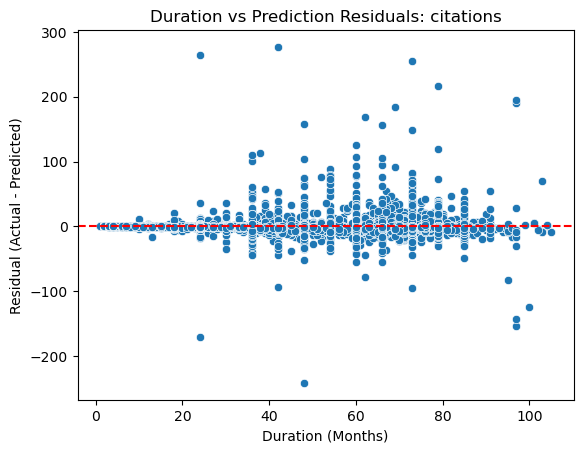

In [17]:
data['residuals_citations'] = data['num_citations'] - data['pred_citations']

sns.scatterplot(x='duration_months', y='residuals', data=data)
plt.axhline(0, color='red', linestyle='--')
plt.title('Duration vs Prediction Residuals: citations')
plt.xlabel('Duration (Months)')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

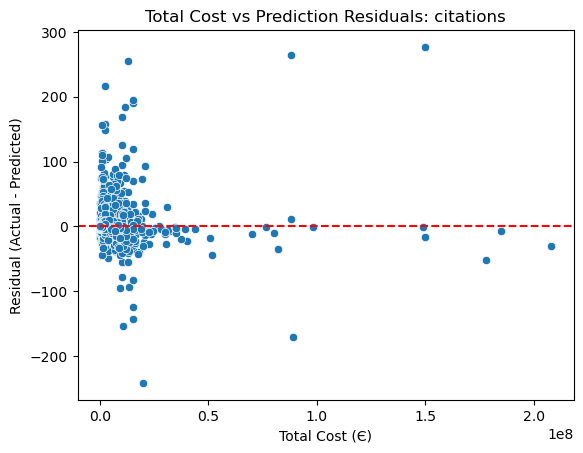

In [21]:
data['residuals_citations'] = data['num_citations'] - data['pred_citations']

sns.scatterplot(x='totalCost', y='residuals', data=data)
plt.axhline(0, color='red', linestyle='--')
plt.title('Total Cost vs Prediction Residuals: citations')
plt.xlabel('Total Cost (Є)')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

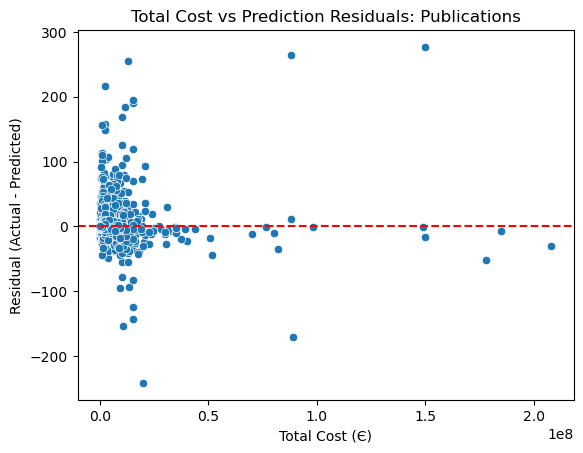

In [23]:
data['residuals'] = data['num_publications'] - data['pred_publications']

sns.scatterplot(x='totalCost', y='residuals', data=data)
plt.axhline(0, color='red', linestyle='--')
plt.title('Total Cost vs Prediction Residuals: Publications')
plt.xlabel('Total Cost (Є)')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

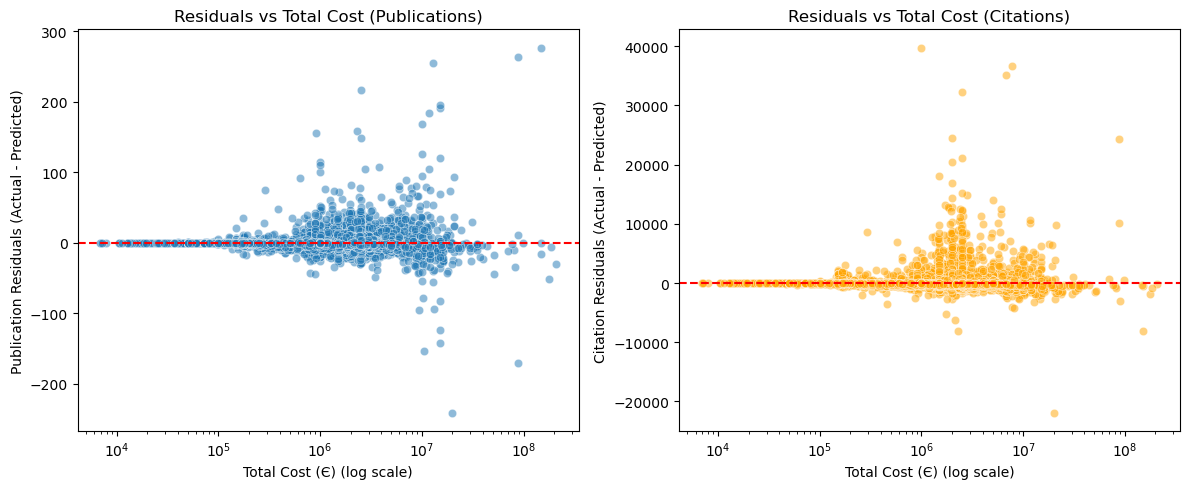

In [31]:


# Calculate residuals (actual - predicted)
data['residuals_publications'] = data['num_publications'] - data['pred_publications']
data['residuals_citations'] = data['num_citations'] - data['pred_citations']

# Plot residuals vs totalCost for publications
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='totalCost', y='residuals_publications', data=data, alpha=0.5)
plt.xscale('log')
plt.xlabel('Total Cost (Є) (log scale)')
plt.ylabel('Publication Residuals (Actual - Predicted)')
plt.title('Residuals vs Total Cost (Publications)')
plt.axhline(0, color='red', linestyle='--')

# Plot residuals vs totalCost for citations
plt.subplot(1, 2, 2)
sns.scatterplot(x='totalCost', y='residuals_citations', data=data, alpha=0.5, color='orange')
plt.xscale('log')
plt.xlabel('Total Cost (Є) (log scale)')
plt.ylabel('Citation Residuals (Actual - Predicted)')
plt.title('Residuals vs Total Cost (Citations)')
plt.axhline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()


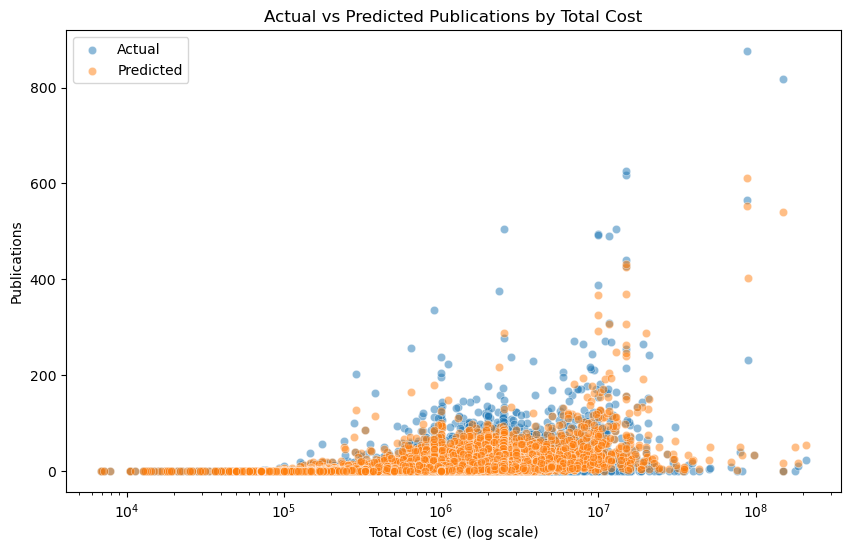

In [35]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='totalCost', y='num_publications', data=data, label='Actual', alpha=0.5)
sns.scatterplot(x='totalCost', y='pred_publications', data=data, label='Predicted', alpha=0.5)

plt.xscale('log')
plt.xlabel('Total Cost (Є) (log scale)')
plt.ylabel('Publications')
plt.title('Actual vs Predicted Publications by Total Cost')
plt.legend()
plt.show()

C:\Users\jawri\AppData\Local\Temp\ipykernel_10632\2389572462.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('cost_bin').agg({


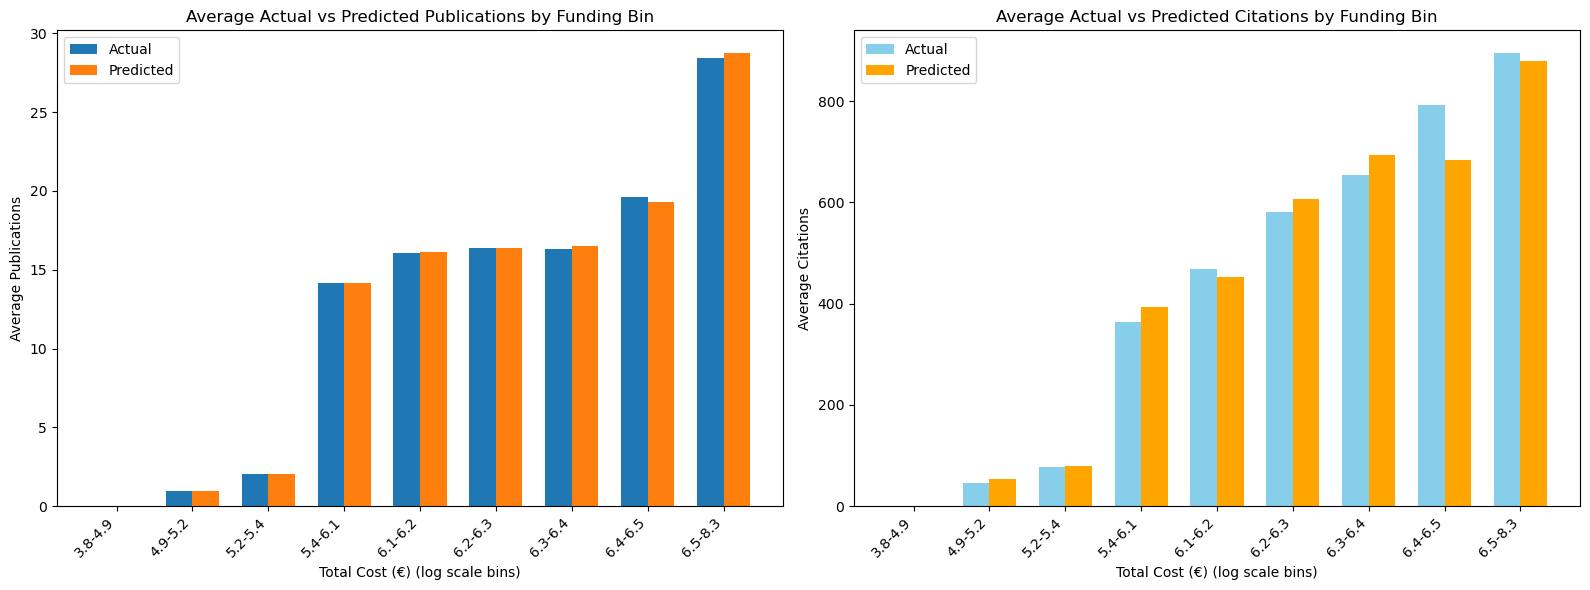

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'

# Create funding bins (log scale) with 10 quantiles

data['cost_bin'] = pd.qcut(np.log10(data['totalCost'] + 1), q=10, duplicates='drop')

# Aggregate mean actual and predicted values by funding bins
grouped = data.groupby('cost_bin').agg({
    'num_publications': 'mean',
    'pred_publications': 'mean',
    'num_citations': 'mean',
    'pred_citations': 'mean'
}).reset_index()

x = np.arange(len(grouped))
width = 0.35

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Publications plot
ax1.bar(x - width/2, grouped['num_publications'], width, label='Actual')
ax1.bar(x + width/2, grouped['pred_publications'], width, label='Predicted')
ax1.set_xticks(x)
ax1.set_xticklabels([f"{round(interval.left,1)}-{round(interval.right,1)}" for interval in grouped['cost_bin']], rotation=45, ha='right')
ax1.set_ylabel('Average Publications')
ax1.set_title('Average Actual vs Predicted Publications by Funding Bin')
ax1.set_xlabel('Total Cost (€) (log scale bins)')
ax1.legend()

# Citations plot
ax2.bar(x - width/2, grouped['num_citations'], width, label='Actual', color='skyblue')
ax2.bar(x + width/2, grouped['pred_citations'], width, label='Predicted', color='orange')
ax2.set_xticks(x)
ax2.set_xticklabels([f"{round(interval.left,1)}-{round(interval.right,1)}" for interval in grouped['cost_bin']], rotation=45, ha='right')
ax2.set_ylabel('Average Citations')
ax2.set_title('Average Actual vs Predicted Citations by Funding Bin')
ax2.set_xlabel('Total Cost (€) (log scale bins)')
ax2.legend()

plt.tight_layout()
plt.show()


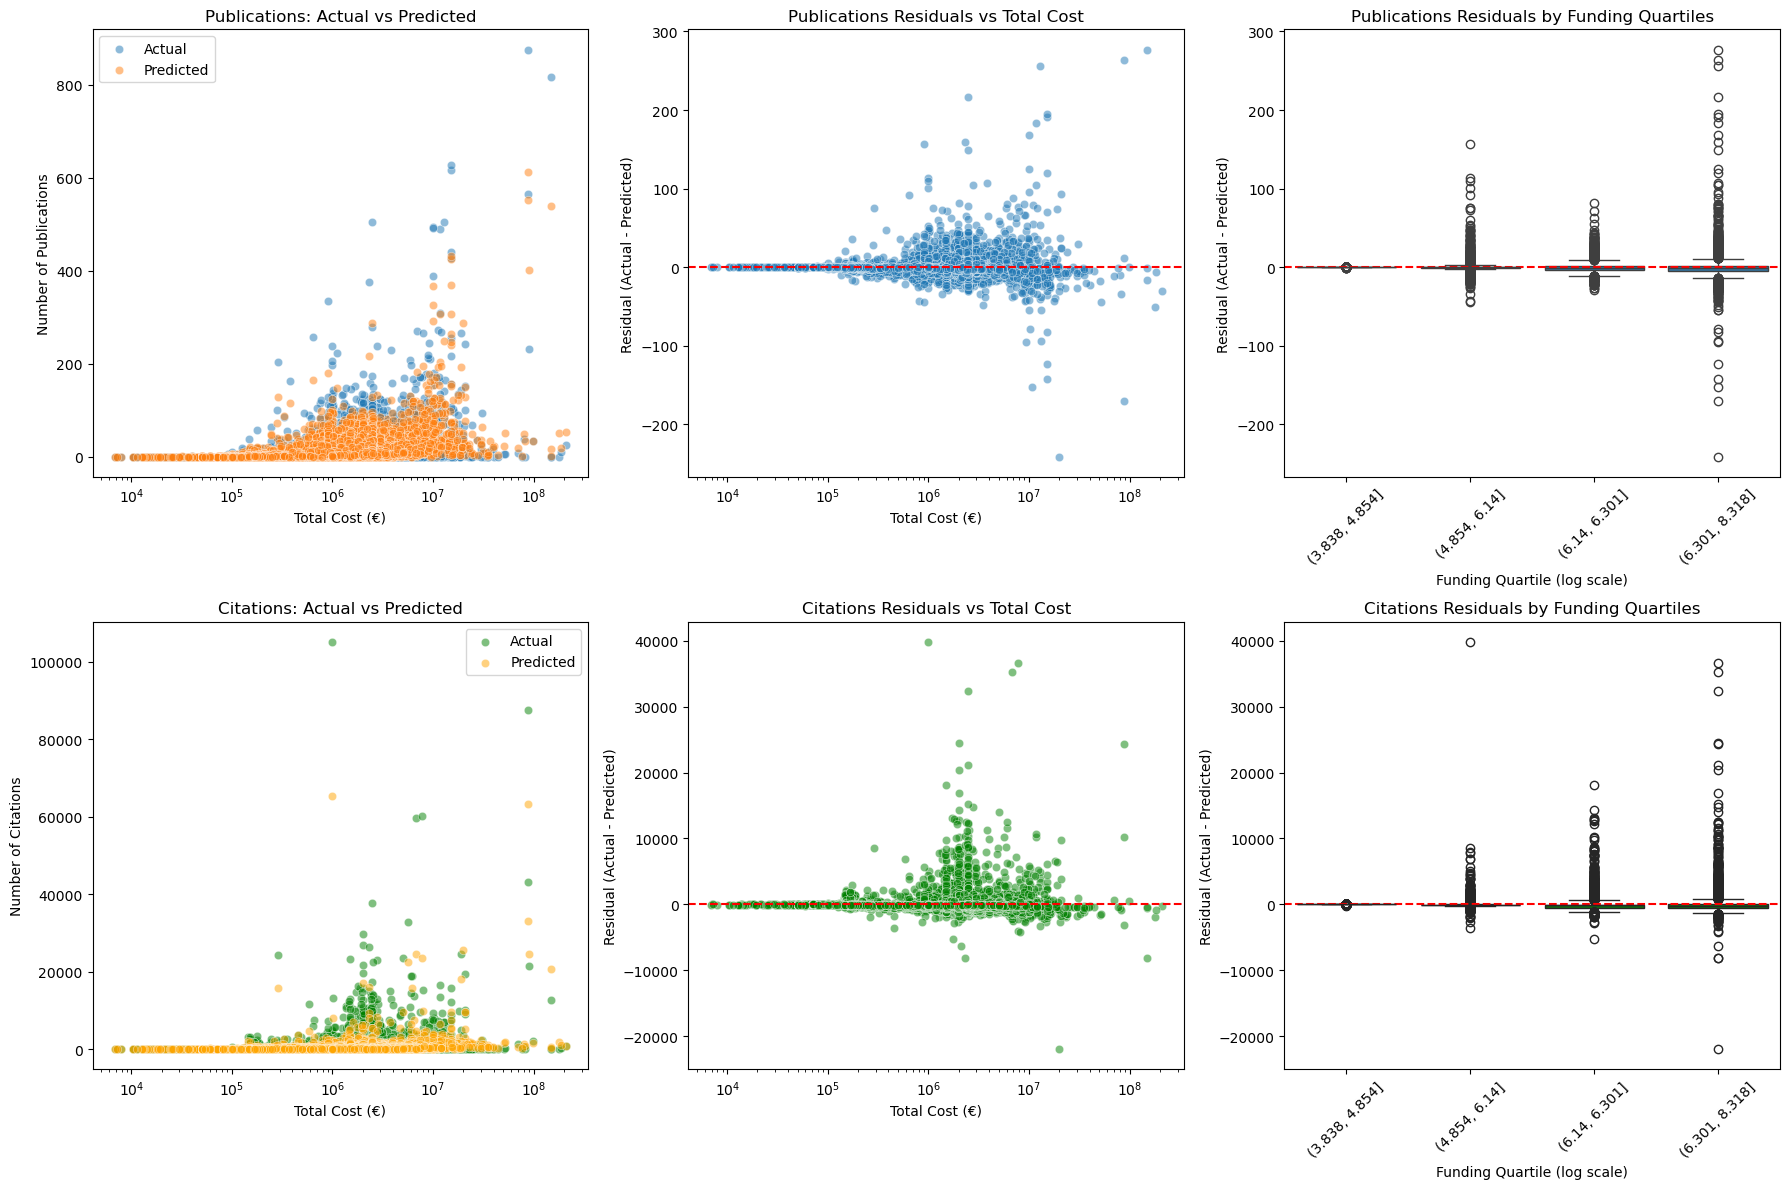

In [41]:

data['residuals_pub'] = data['num_publications'] - data['pred_publications']
data['residuals_cit'] = data['num_citations'] - data['pred_citations']

# Set key feature for error analysis
key_feature = 'totalCost'

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Publications: Actual vs Predicted
sns.scatterplot(x=key_feature, y='num_publications', data=data, ax=axs[0,0], label='Actual', alpha=0.5)
sns.scatterplot(x=key_feature, y='pred_publications', data=data, ax=axs[0,0], label='Predicted', alpha=0.5)
axs[0,0].set_title('Publications: Actual vs Predicted')
axs[0,0].set_xscale('log')
axs[0,0].set_xlabel('Total Cost (€)')
axs[0,0].set_ylabel('Number of Publications')
axs[0,0].legend()

# Publications: Residuals vs Feature
sns.scatterplot(x=key_feature, y='residuals_pub', data=data, ax=axs[0,1], alpha=0.5)
axs[0,1].axhline(0, color='red', linestyle='--')
axs[0,1].set_title('Publications Residuals vs Total Cost')
axs[0,1].set_xscale('log')
axs[0,1].set_xlabel('Total Cost (€)')
axs[0,1].set_ylabel('Residual (Actual - Predicted)')

# Publications: Residuals by funding quartile
data['cost_bin'] = pd.qcut(np.log10(data[key_feature]+1), q=4, duplicates='drop')
sns.boxplot(x='cost_bin', y='residuals_pub', data=data, ax=axs[0,2])
axs[0,2].axhline(0, color='red', linestyle='--')
axs[0,2].set_title('Publications Residuals by Funding Quartiles')
axs[0,2].set_xlabel('Funding Quartile (log scale)')
axs[0,2].set_ylabel('Residual (Actual - Predicted)')
axs[0,2].tick_params(axis='x', rotation=45)

# Repeat for Citations
sns.scatterplot(x=key_feature, y='num_citations', data=data, ax=axs[1,0], label='Actual', alpha=0.5, color='green')
sns.scatterplot(x=key_feature, y='pred_citations', data=data, ax=axs[1,0], label='Predicted', alpha=0.5, color='orange')
axs[1,0].set_title('Citations: Actual vs Predicted')
axs[1,0].set_xscale('log')
axs[1,0].set_xlabel('Total Cost (€)')
axs[1,0].set_ylabel('Number of Citations')
axs[1,0].legend()

sns.scatterplot(x=key_feature, y='residuals_cit', data=data, ax=axs[1,1], alpha=0.5, color='green')
axs[1,1].axhline(0, color='red', linestyle='--')
axs[1,1].set_title('Citations Residuals vs Total Cost')
axs[1,1].set_xscale('log')
axs[1,1].set_xlabel('Total Cost (€)')
axs[1,1].set_ylabel('Residual (Actual - Predicted)')

sns.boxplot(x='cost_bin', y='residuals_cit', data=data, ax=axs[1,2], color='green')
axs[1,2].axhline(0, color='red', linestyle='--')
axs[1,2].set_title('Citations Residuals by Funding Quartiles')
axs[1,2].set_xlabel('Funding Quartile (log scale)')
axs[1,2].set_ylabel('Residual (Actual - Predicted)')
axs[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


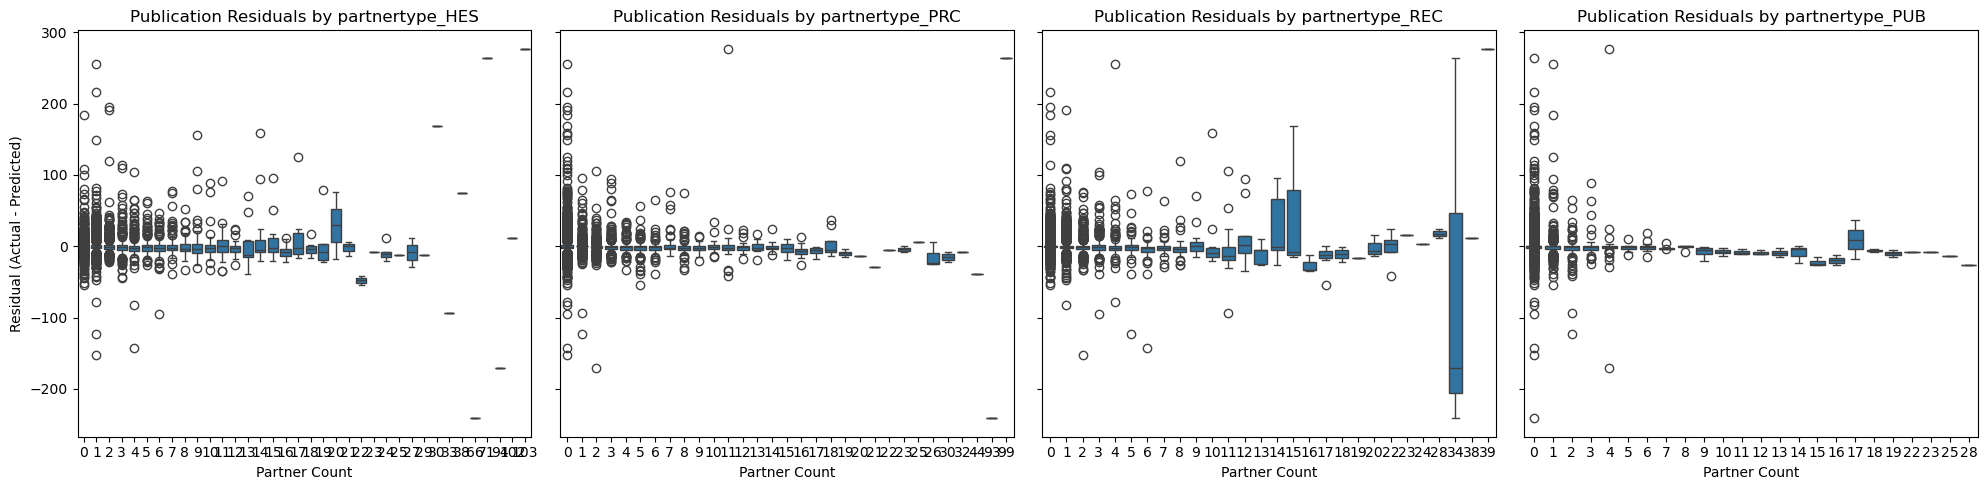

In [45]:
partner_types = ['partnertype_HES', 'partnertype_PRC', 'partnertype_REC', 'partnertype_PUB']

fig, axes = plt.subplots(1, len(partner_types), figsize=(20, 5), sharey=True)

for ax, partner in zip(axes, partner_types):
    sns.boxplot(x=partner, y='residuals_pub', data=data, ax=ax)
    ax.set_title(f'Publication Residuals by {partner}')
    ax.set_xlabel('Partner Count')
    ax.set_ylabel('Residual (Actual - Predicted)')

plt.tight_layout()
plt.show()

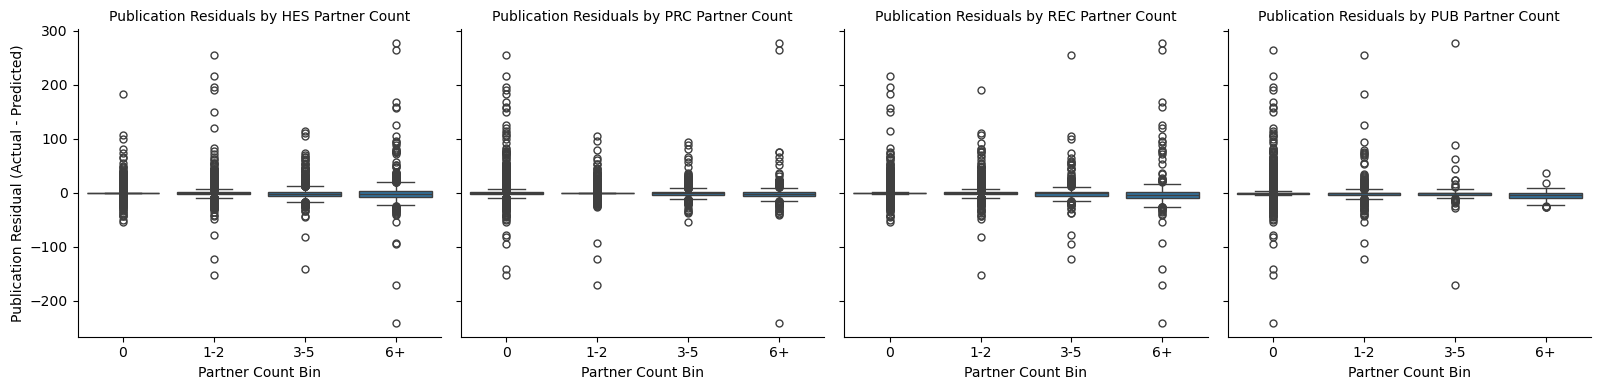

In [55]:


bins = [0, 1, 3, 6, data[['partnertype_HES', 'partnertype_PRC', 'partnertype_REC', 'partnertype_PUB']].max().max() + 1]
labels = ['0', '1-2', '3-5', '6+']

# Create binned columns for each partner type
for ptype in ['partnertype_HES', 'partnertype_PRC', 'partnertype_REC', 'partnertype_PUB']:
    data[f'{ptype}_bin'] = pd.cut(data[ptype], bins=bins, labels=labels, right=False)

# Prepare data for seaborn by melting partner types into one column
df_list = []
for ptype in ['partnertype_HES', 'partnertype_PRC', 'partnertype_REC', 'partnertype_PUB']:
    temp = data[[f'{ptype}_bin', 'residuals_pub']].copy()
    temp['partner_type'] = ptype.replace('partnertype_', '')
    temp.rename(columns={f'{ptype}_bin': 'partner_count_bin'}, inplace=True)
    df_list.append(temp)

df_melted = pd.concat(df_list)

# Plot boxplots faceted by partner type
g = sns.catplot(
    x='partner_count_bin', y='residuals_pub', col='partner_type',
    data=df_melted, kind='box', height=4, aspect=1
)

g.set_axis_labels("Partner Count Bin", "Publication Residual (Actual - Predicted)")
g.set_titles("Publication Residuals by {col_name} Partner Count")
plt.tight_layout()
plt.show()




C:\Users\jawri\AppData\Local\Temp\ipykernel_10632\10238369.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(f'{ptype}_bin')['residuals_pub'].agg(['median', sem]).reset_index()
C:\Users\jawri\AppData\Local\Temp\ipykernel_10632\10238369.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(f'{ptype}_bin')['residuals_pub'].agg(['median', sem]).reset_index()
C:\Users\jawri\AppData\Local\Temp\ipykernel_10632\10238369.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to ret

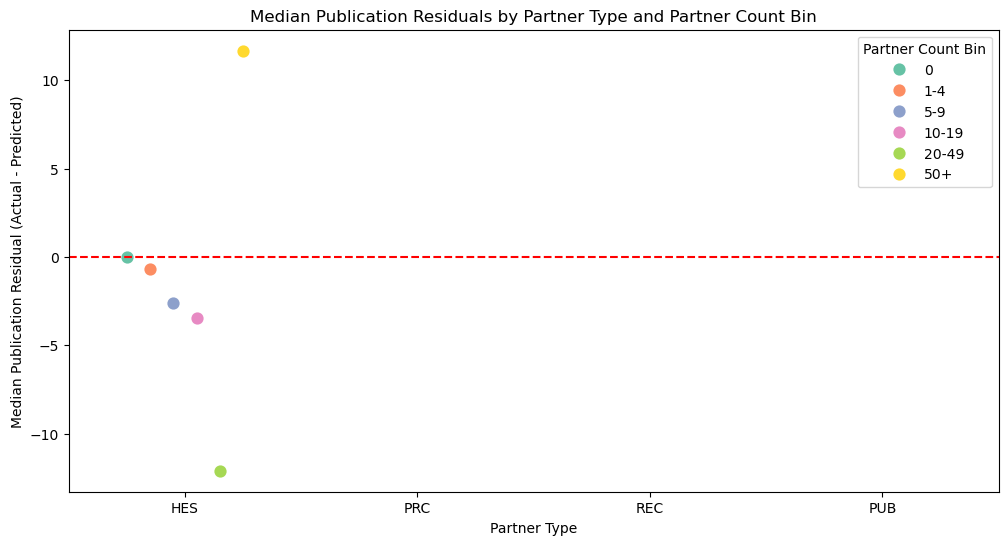

In [63]:

from scipy.stats import sem

partner_bins = {
    'partnertype_HES': [0, 1, 5, 10, 20, 50, np.inf],
    'partnertype_PRC': [0, 1, 5, 10, 20, 50, np.inf],
    'partnertype_REC': [0, 1, 5, 10, 20, 50, np.inf],
    'partnertype_PUB': [0, 1, 5, 10, 20, 50, np.inf]
}

partner_labels = ['0', '1-4', '5-9', '10-19', '20-49', '50+']

summary_df = pd.DataFrame()

for ptype in partner_bins.keys():
    # Create binned column per partner type
    data[f'{ptype}_bin'] = pd.cut(data[ptype], bins=partner_bins[ptype], labels=partner_labels, right=False)
    
    # Aggregate median and SEM of residuals per bin
    grouped = data.groupby(f'{ptype}_bin')['residuals_pub'].agg(['median', sem]).reset_index()
    grouped['partner_type'] = ptype.replace('partnertype_', '')
    grouped.rename(columns={'median': 'median_residual', 'sem': 'sem_residual'}, inplace=True)
    
    summary_df = pd.concat([summary_df, grouped], ignore_index=True)

# Plot median residuals with error bars for SEM
plt.figure(figsize=(12,6))
sns.pointplot(
    x='partner_type', y='median_residual', hue='partnertype_HES_bin',
    data=summary_df, dodge=0.5, join=False, palette='Set2', ci=None
)

# Adjust legend to show bins properly
plt.legend(title='Partner Count Bin')
plt.axhline(0, color='red', linestyle='--')
plt.ylabel('Median Publication Residual (Actual - Predicted)')
plt.xlabel('Partner Type')
plt.title('Median Publication Residuals by Partner Type and Partner Count Bin')
plt.show()



In [69]:
# Over-predicted (model predicts higher than actual): residual < 0
top_over_pred_pub = data.nsmallest(10, 'residuals_pub')[['projectID', 'num_publications', 'pred_publications', 'residuals_pub']]

# Under-predicted (model predicts lower than actual): residual > 0
top_under_pred_pub = data.nlargest(10, 'residuals_pub')[['projectID', 'num_publications', 'pred_publications', 'residuals_pub']]

print("Top 10 Over-predicted Publications:")
print(top_over_pred_pub.to_string(index=False))

print("\nTop 10 Under-predicted Publications:")
print(top_under_pred_pub.to_string(index=False))

# Repeat for citations
top_over_pred_cit = data.nsmallest(10, 'residuals_cit')[['projectID', 'num_citations', 'pred_citations', 'residuals_cit']]
top_under_pred_cit = data.nlargest(10, 'residuals_cit')[['projectID', 'num_citations', 'pred_citations', 'residuals_cit']]

print("\nTop 10 Over-predicted Citations:")
print(top_over_pred_cit.to_string(index=False))

print("\nTop 10 Under-predicted Citations:")
print(top_under_pred_cit.to_string(index=False))



Top 10 Over-predicted Publications:
 projectID  num_publications  pred_publications  residuals_pub
    952792                46         287.170270    -241.170270
    720270               231         401.854048    -170.854048
    810296                19         172.029524    -153.029524
    857251                14         156.248135    -142.248135
    857510                28         151.401314    -123.401314
    951281                 2          97.231400     -95.231400
    643410                 9         102.831386     -93.831386
    739566               157         239.837463     -82.837463
    665919                76         154.344315     -78.344315
    801604                39          93.959688     -54.959688

Top 10 Under-predicted Publications:
 projectID  num_publications  pred_publications  residuals_pub
    945539               817         540.157542     276.842458
    785219               876         611.793887     264.206113
    754510               505         249.496

In [71]:
print('Correlation matrix:')
print(data[['totalCost', 'duration_months', 'total_partners', 'num_publications', 'num_citations']].corr())


Correlation matrix:
                  totalCost  duration_months  total_partners  \
totalCost          1.000000         0.245659        0.440378   
duration_months    0.245659         1.000000        0.096355   
total_partners     0.440378         0.096355        1.000000   
num_publications   0.306923         0.368701        0.334851   
num_citations      0.184021         0.173090        0.215103   

                  num_publications  num_citations  
totalCost                 0.306923       0.184021  
duration_months           0.368701       0.173090  
total_partners            0.334851       0.215103  
num_publications          1.000000       0.547488  
num_citations             0.547488       1.000000  


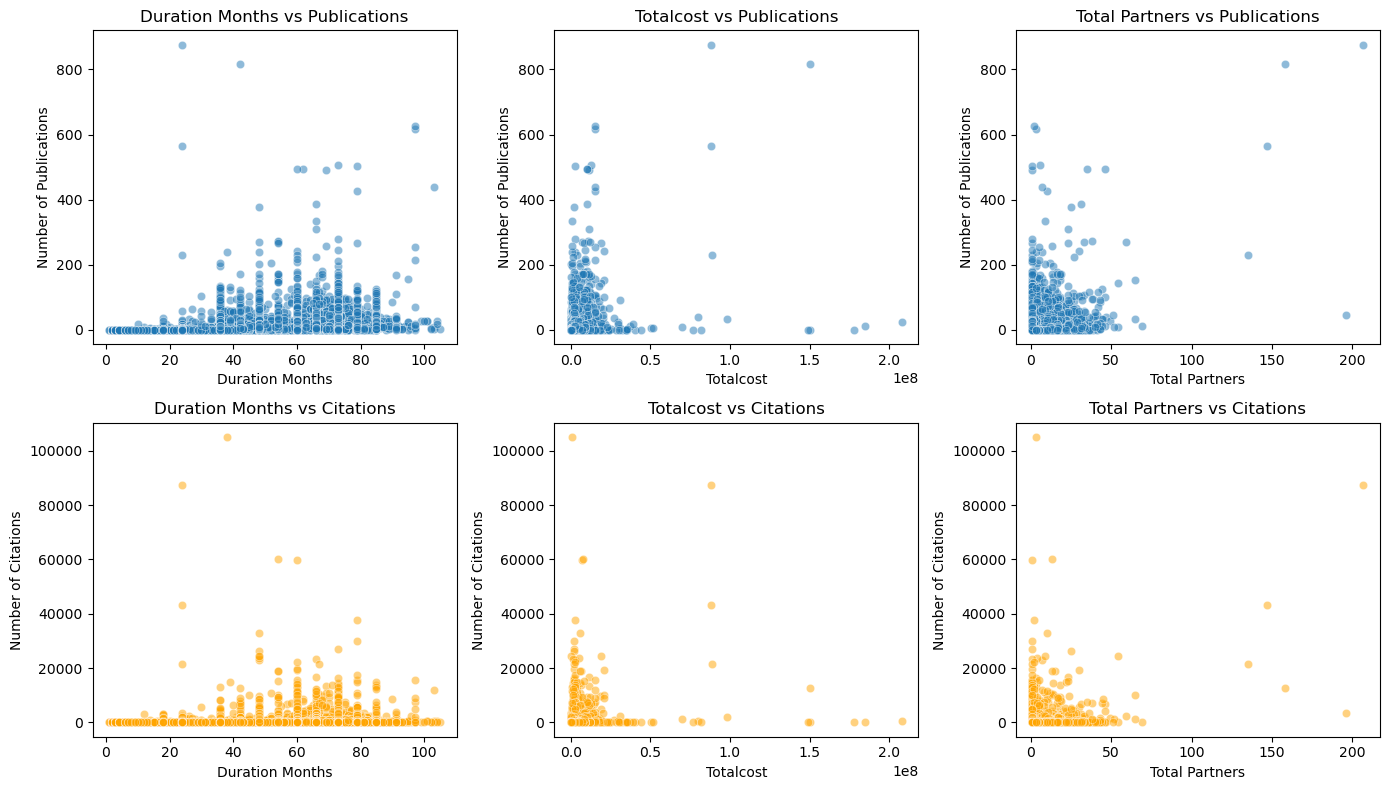

In [73]:

features_to_plot = ['duration_months', 'totalCost', 'total_partners']
outcomes = ['num_publications', 'num_citations']

plt.figure(figsize=(14, 8))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='num_publications', data=data, alpha=0.5)
    plt.title(f'{feature.replace("_", " ").title()} vs Publications')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Number of Publications')
    
    plt.subplot(2, 3, i+3)
    sns.scatterplot(x=feature, y='num_citations', data=data, alpha=0.5, color='orange')
    plt.title(f'{feature.replace("_", " ").title()} vs Citations')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Number of Citations')

plt.tight_layout()
plt.show()


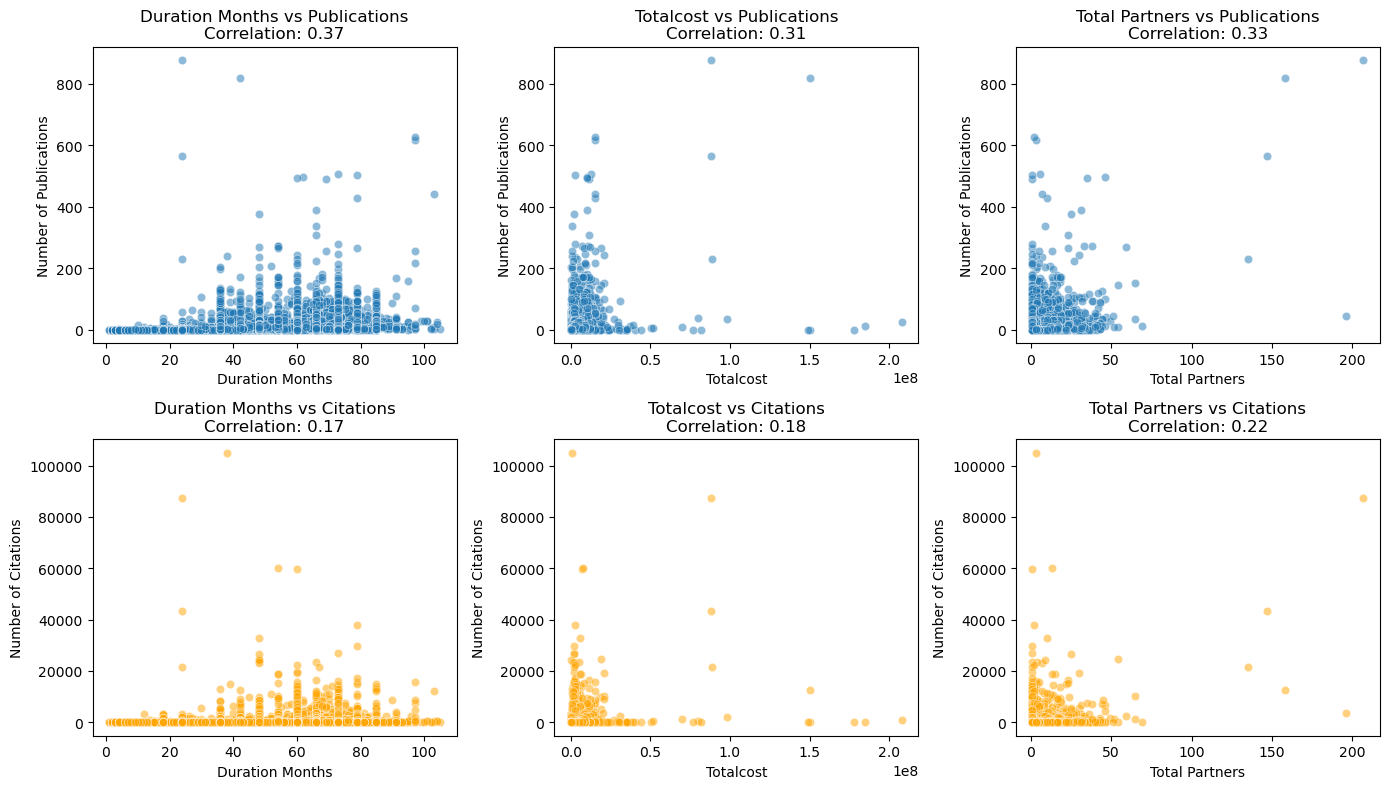

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

features_to_plot = ['duration_months', 'totalCost', 'total_partners']

plt.figure(figsize=(14, 8))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='num_publications', data=data, alpha=0.5)
    corr, _ = pearsonr(data[feature], data['num_publications'])
    plt.title(f'{feature.replace("_", " ").title()} vs Publications\nCorrelation: {corr:.2f}')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Number of Publications')
    
    plt.subplot(2, 3, i+3)
    sns.scatterplot(x=feature, y='num_citations', data=data, alpha=0.5, color='orange')
    corr, _ = pearsonr(data[feature], data['num_citations'])
    plt.title(f'{feature.replace("_", " ").title()} vs Citations\nCorrelation: {corr:.2f}')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Number of Citations')

plt.tight_layout()
plt.show()


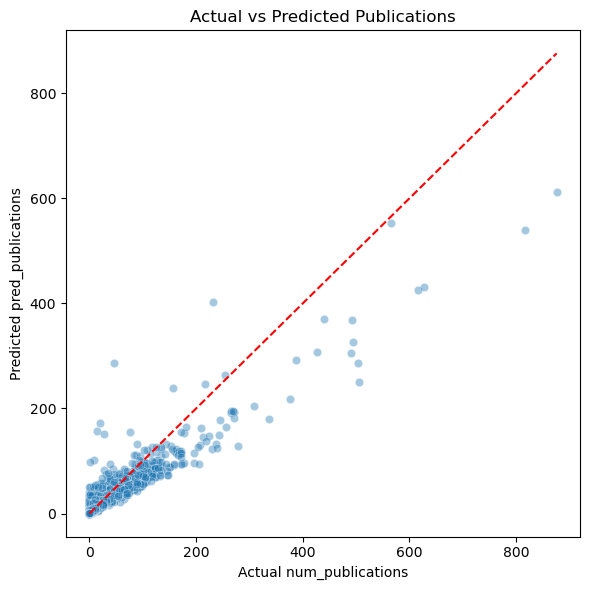

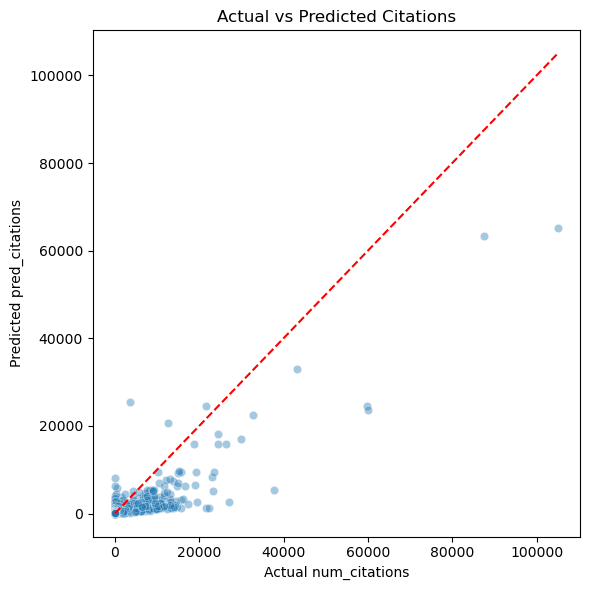

In [81]:
def plot_actual_vs_predicted_df(df, actual_col, pred_col, title):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=actual_col, y=pred_col, data=df, alpha=0.4)
    plt.plot([df[actual_col].min(), df[actual_col].max()],
             [df[actual_col].min(), df[actual_col].max()], 'r--')  # y=x line
    plt.title(title)
    plt.xlabel(f'Actual {actual_col}')
    plt.ylabel(f'Predicted {pred_col}')
    plt.tight_layout()
    plt.show()

# Publications plot
plot_actual_vs_predicted_df(data, 'num_publications', 'pred_publications', 'Actual vs Predicted Publications')

# Citations plot
plot_actual_vs_predicted_df(data, 'num_citations', 'pred_citations', 'Actual vs Predicted Citations')



C:\Users\jawri\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\jawri\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


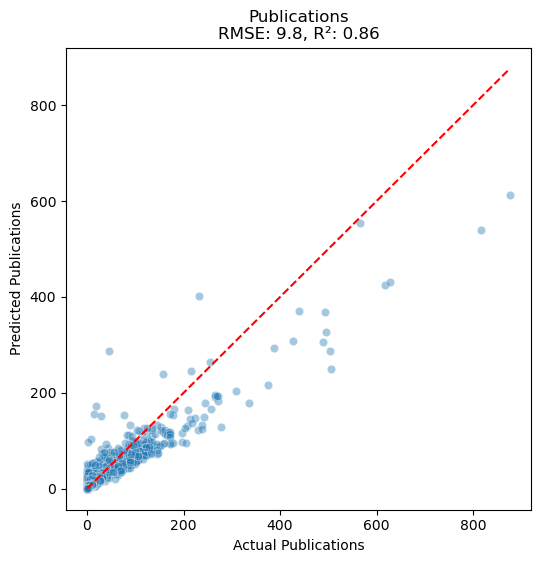

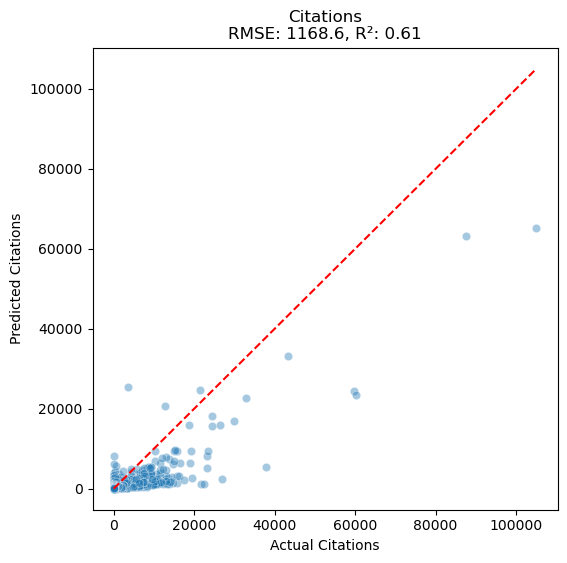

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_pub = mean_squared_error(data['num_publications'], data['pred_publications'], squared=False)
r2_pub = r2_score(data['num_publications'], data['pred_publications'])

rmse_cit = mean_squared_error(data['num_citations'], data['pred_citations'], squared=False)
r2_cit = r2_score(data['num_citations'], data['pred_citations'])



# Plot Publications
plt.figure(figsize=(6,6))
sns.scatterplot(x='num_publications', y='pred_publications', data=data, alpha=0.4)
plt.plot([0, data['num_publications'].max()], [0, data['num_publications'].max()], 'r--')
plt.title(f'Publications\nRMSE: {rmse_pub:.1f}, R²: {r2_pub:.2f}')
plt.xlabel('Actual Publications')
plt.ylabel('Predicted Publications')
plt.show()

# Plot Citations
plt.figure(figsize=(6,6))
sns.scatterplot(x='num_citations', y='pred_citations', data=data, alpha=0.4)
plt.plot([0, data['num_citations'].max()], [0, data['num_citations'].max()], 'r--')
plt.title(f'Citations\nRMSE: {rmse_cit:.1f}, R²: {r2_cit:.2f}')
plt.xlabel('Actual Citations')
plt.ylabel('Predicted Citations')
plt.show()
